# Imports

In [20]:
import re
import os
import difflib
import itertools
import collections
import datetime

In [21]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import pycountry

In [22]:
%run data_processing/forza/data_cleaning.ipynb
%run data_processing/forza/data_extraction.ipynb
%run data_processing/forza/vehicle_data_list_record_functions.ipynb

<>:18: SyntaxWarning:

invalid escape sequence '\['

<>:18: SyntaxWarning:

invalid escape sequence '\]'

C:\Users\nigel\AppData\Local\Temp\ipykernel_9948\1496720473.py:18: SyntaxWarning:

invalid escape sequence '\['

C:\Users\nigel\AppData\Local\Temp\ipykernel_9948\1496720473.py:18: SyntaxWarning:

invalid escape sequence '\]'

<>:4: SyntaxWarning:

invalid escape sequence '\*'

<>:4: SyntaxWarning:

invalid escape sequence '\['

<>:4: SyntaxWarning:

invalid escape sequence '\]'

C:\Users\nigel\AppData\Local\Temp\ipykernel_9948\3851270001.py:4: SyntaxWarning:

invalid escape sequence '\*'

C:\Users\nigel\AppData\Local\Temp\ipykernel_9948\3851270001.py:4: SyntaxWarning:

invalid escape sequence '\['

C:\Users\nigel\AppData\Local\Temp\ipykernel_9948\3851270001.py:4: SyntaxWarning:

invalid escape sequence '\]'



# Game List Variables

## Games Dictionary

In [23]:
# Format {game_title: url_section}
games_dict = {
    "Forza Motorsport 1":      "Forza_Motorsport_(2005)/Cars",
    "Forza Motorsport 2":      "Forza_Motorsport_2/Cars",
    "Forza Motorsport 3":      "Forza_Motorsport_3/Cars",
    "Forza Motorsport 4":      "Forza_Motorsport_4/Cars",
    "Forza Motorsport 5":      "Forza_Motorsport_5/Cars",
    "Forza Motorsport 6":      "Forza_Motorsport_6/Cars",
    "Forza Motorsport 7":      "Forza_Motorsport_7/Cars",
    "Forza Horizon 1":         "Forza_Horizon/Cars",
    "Forza Horizon 2":         "Forza_Horizon_2/Cars",
    "Forza Horizon 3":         "Forza_Horizon_3/Cars",
    "Forza Horizon 4":         "Forza_Horizon_4/Cars",
    "Forza Horizon 5":         "Forza_Horizon_5/Cars",
    "Forza Street":            "Forza_Street/Cars",
}

## Enable Print List

In [24]:
# Uncomment one or more game titles to print out the processed data for each uncommented game.
enable_print_list = [
    #"Forza Motorsport 1",
    #"Forza Motorsport 2",
    #"Forza Motorsport 3",
    #"Forza Motorsport 4",
    #"Forza Motorsport 5",
    #"Forza Motorsport 6",
    #"Forza Motorsport 7",
    #"Forza Horizon 1",
    #"Forza Horizon 2",
    #"Forza Horizon 3",
    #"Forza Horizon 4",
    #"Forza Horizon 5",
    #"Forza Street",
]

# Settings

## URLS

In [25]:
base_url = "https://forza.fandom.com"
api_url = f"{base_url}/api.php"
base_wiki_url = f"{base_url}/wiki"

## Test Scripts Folder

In [26]:
test_scripts_folder = "test_scripts/forza"

## Data Source Mode

In [27]:
"""
Data Source Modes:
    DEV: use the test scripts
    PROD: use the MediaWiki API
"""
data_source_mode = "DEV"

## Save to Output File

In [28]:
save_to_output_file = True
output_file_name = "forza.csv"

## Update Output File

In [29]:
update_output_file = True

## Save Markup

In [30]:
save_markup = False
save_markup_folder = f"Markup Archive {datetime.datetime.now().strftime('%Y-%m-%d %H-%M-%S-%f')}"

# Data Collecting and Processing

In [31]:
if data_source_mode == "DEV":
    for game in games_dict.keys():
        if game in enable_print_list:
            print(game)
        data = ""
        with open(
            f"{test_scripts_folder.strip('/')}/{game}.txt", 
            mode="r", 
            encoding="utf-8"
        ) as file:
            for line in file:
                data += line.strip("")
        data = data.split("\n")
        forza_data_extraction(game, data)
elif data_source_mode == "PROD":
    """
    Based on:
        * https://www.jcchouinard.com/wikipedia-api/
        * https://community.fandom.com/f/p/3814380756008962153
    """
    if save_markup == True:
        if os.path.exists(save_markup_folder) == False:
            os.mkdir(save_markup_folder)
    for game in games_dict.keys():
        if game in enable_print_list:
            print(game)
        params = {
            "action": "query",
            "format": "json",
            "titles": games_dict[game],
            "prop": "revisions",
            "rvprop": "content"
        }
        response_json = requests.get(
            api_url, 
            params = params
        ).json()
        data = next(
            iter(
                response_json["query"]["pages"].values()
            )
        )["revisions"][0]["*"]
        if save_markup == True:
            with open(
                f"{save_markup_folder.strip('/')}/{game}.txt", 
                mode="w", 
                encoding="utf-8"
            ) as file:
                file.write(data)
        data = data.split("\n")
        forza_data_extraction(game, data)
else:
    print("Please select a mode")

In [32]:
vehicle_df = pd.DataFrame(
    vehicle_data_list,
    columns = [
        "Game",
        "Manufacturer",
        "Vehicle Name", 
        "Vehicle Name Alternative", 
        "Year", 
        "How to Obtain", 
        "Value", 
        "Performance Index Class", 
        "Performance Index Number",
        "Type",
        "Era",
        "Country",
        "Rarity",
        "Rarity Rating",
        "Speed Rating", 
        "Acceleration Rating", 
        "Braking Rating", 
        "Handling Rating", 
        "Launch Rating",
        "Offroad Rating",
        "Link"
    ]
).convert_dtypes()
del vehicle_data_list
display(vehicle_df)

,Game,Manufacturer,Vehicle Name,Vehicle Name Alternative,Year,How to Obtain,Value,Performance Index Class,Performance Index Number,Type,...,Country,Rarity,Rarity Rating,Speed Rating,Acceleration Rating,Braking Rating,Handling Rating,Launch Rating,Offroad Rating,Link
0,Forza Motorsport 1,AC,AC Shelby Cobra 427 SC,AC Shelby Cobra 427 SC,1967,Base Game,127000,A1,<NA>,<NA>,...,<NA>,<NA>,7.3,6.5,7.1,4.6,4.6,<NA>,<NA>,https://forza.fandom.com/wiki/AC_Shelby_Cobra_...
1,Forza Motorsport 1,Acura,Acura #42 Realtime Racing NSX,Acura 42 Realtime Racing NSX,2002,Base Game,268000,R-GT,<NA>,<NA>,...,<NA>,<NA>,9.8,6.3,7.4,6.3,6.1,<NA>,<NA>,https://forza.fandom.com/wiki/Acura_42_Realtim...
2,Forza Motorsport 1,Acura,Acura 3.2 CL Type-S,<NA>,2003,Base Game,24000,D2,<NA>,<NA>,...,<NA>,<NA>,4.8,5.4,4.5,4.2,4.3,<NA>,<NA>,https://forza.fandom.com/wiki/Acura_3.2_CL_Type-S
3,Forza Motorsport 1,Acura,Acura Integra Type-R,<NA>,2001,Base Game,24000,D1,<NA>,<NA>,...,<NA>,<NA>,4.7,5.5,4.5,4.2,4.4,<NA>,<NA>,https://forza.fandom.com/wiki/Acura_Integra_Ty...
4,Forza Motorsport 1,Acura,Acura VIS Racing Integra Type-R,<NA>,2000,Base Game,88000,B4,<NA>,<NA>,...,<NA>,<NA>,7.3,5.4,5.2,4.7,4.8,<NA>,<NA>,https://forza.fandom.com/wiki/Acura_VIS_Racing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,Forza Street,Porsche,Porsche 914/6,<NA>,1970,Base Game,<NA>,<NA>,<NA>,Classic,...,<NA>,Common,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,https://forza.fandom.com/wiki/Porsche_914/6
6245,Forza Street,Porsche,Porsche 918 Spyder,<NA>,2014,Base Game,<NA>,<NA>,<NA>,Modern,...,<NA>,Epic,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,https://forza.fandom.com/wiki/Porsche_918_Spyder
6246,Forza Street,Porsche,Porsche 944 Turbo,<NA>,1989,Base Game,<NA>,<NA>,<NA>,Retro,...,<NA>,Common,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,https://forza.fandom.com/wiki/Porsche_944_Turbo
6247,Forza Street,Porsche,Porsche Carrera GT,<NA>,2003,Base Game,<NA>,<NA>,<NA>,Modern,...,<NA>,Rare,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,https://forza.fandom.com/wiki/Porsche_Carrera_GT


In [33]:
if save_to_output_file == True:
    if not os.path.exists(output_file_name):
        vehicle_df.to_csv(
            output_file_name, 
            index = False
        )
        print("CSV file created")
    elif update_output_file == True:
        vehicle_df.to_csv(
            output_file_name, 
            index = False
        )
        print("CSV file updated")
    else:
        print("CSV file not updated")

CSV file updated


# Data Visualisation
Note: Interactive Plotly diagrams cannot be displayed on Github. Clone the repository and run the project to view the diagrams.

## Forza Horizon Series Ferrari & Lamborghini (Sankey)

In [34]:
games_list = [
    game_title
    for game_title in sorted(
        set(vehicle_df["Game"])
    )
    if "Horizon" in game_title
]
manufacturers_list = [
    "Ferrari", "Lamborghini"
]

In [35]:
sank_label = list(
    itertools.chain(
        games_list,
        manufacturers_list,
    )
)

sank_source = []
sank_target = []
sank_value = []

for game in games_list:
    game_manufacturer_counter = collections.Counter(
        sorted(
            vehicle_df.loc[
                vehicle_df["Game"] == game,
                "Manufacturer"
            ]
        )
    )
    for manufacturer in manufacturers_list:
        value = 0
        if manufacturer in game_manufacturer_counter.keys():
            value = game_manufacturer_counter[manufacturer]
        sank_source.append(sank_label.index(game))
        sank_target.append(sank_label.index(manufacturer))
        sank_value.append(value)

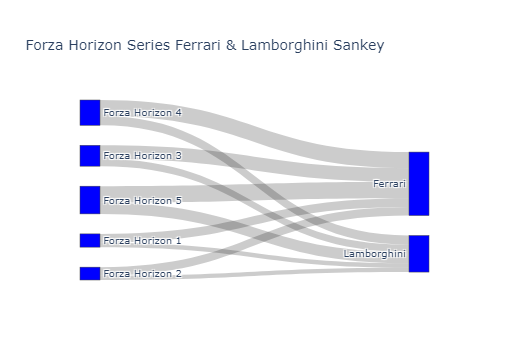

In [36]:
fig = go.Figure(
    data = [
        go.Sankey(
            node = dict(
                label = sank_label,
                color = "blue",
            ),
            link = dict(
                source = sank_source,
                target = sank_target,
                value = sank_value,
            )
        )
    ]
)
fig.update_layout(
    title_text = "Forza Horizon Series Ferrari & Lamborghini Sankey", 
    font_size = 10
)

## World Map of Vehicles in Forza Horizon 5 (Choropleth) 

In [37]:
country_counter = collections.Counter(
    sorted(
        vehicle_df.loc[
            (vehicle_df["Game"] == "Forza Horizon 5") 
            & (vehicle_df["How to Obtain"] != "Traffic"),
            "Country"
        ]
    )
)
country_df = pd.DataFrame.from_dict(
    {
        "Country": country_counter.keys(),
        "Vehicle Count": country_counter.values(),
        "ISO Alpha": [
            pycountry.countries.search_fuzzy(x)[0].alpha_3
            for x in country_counter.keys()
        ]
    }   
)

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')


In [ ]:
fig = px.choropleth(
    country_df, 
    title = "World Map of Vehicles in Forza Horizon 5",
    locations = "ISO Alpha",
    color = "Vehicle Count",
    hover_name = "Country",
    color_continuous_scale = px.colors.sequential.Plasma
)
fig.update_layout(
    font_size = 10,
    height = 800
)